# Project: Which Places Have The Lowest Attendance Of Medical Appointments For Certain Reasons In Brazil(2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

By looking through a dataset originally from "Medical Appointment No Shows", we are curious of what might be the reasons of the patients absence. We will first find out which cities have the most people not showing up when they should be, then analyze the main cause through plotting.

This project includes two questions, which places have the lowest attendance in medical appointments, and what is the most possible reason for their absence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('noshowappointments2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [4]:
sum(df.duplicated())

0

In [5]:
df.shape

(110527, 14)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

* Rename columns
* Fix data types
* Make elements more readable
* Drop unnecessary columns

In [6]:
df = df.rename(columns = {'Handcap' : 'Handicap'})
df = df.rename(columns = {'No-show' : 'No_show'})
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hipertension'] = df['Hipertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)
bool_cols = df.columns[df.dtypes == 'bool']
df[bool_cols] = df[bool_cols].replace({True: 'Yes', False: 'No'})
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age', 'Gender'], axis = 1, inplace = True)
df.head()

,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,JARDIM DA PENHA,No,No,No,No,No,No,No
2,MATA DA PRAIA,No,No,No,No,No,No,No
3,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In the first step, we will create a new data which the patients have at least one health issue, filter out who might go to medical centres for physical or other check-ups.

In [7]:
con = np.where((df.No_show == 'Yes') & ((df.Hipertension == 'Yes') | (df.Scholarship == 'Yes') | (df.Diabetes == 'Yes') | (df.Alcoholism == 'Yes') | (df.Handicap == 'Yes')))
new = df.loc[con]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : Which places have the lowest attendance in medical appointments?

In [30]:
#collect the top 10 neighbourhoods with health issues and not showing up
new['Neighbourhood'].value_counts()[:10]

ITARARÉ             275
RESISTÊNCIA         257
CARATOÍRA           249
ANDORINHAS          222
BONFIM              219
GURIGICA            216
SÃO PEDRO           215
ILHA DO PRÍNCIPE    214
DA PENHA            207
TABUAZEIRO          204
Name: Neighbourhood, dtype: int64

We'll choose the first ten places, where there were over 200 patients absent.[1]

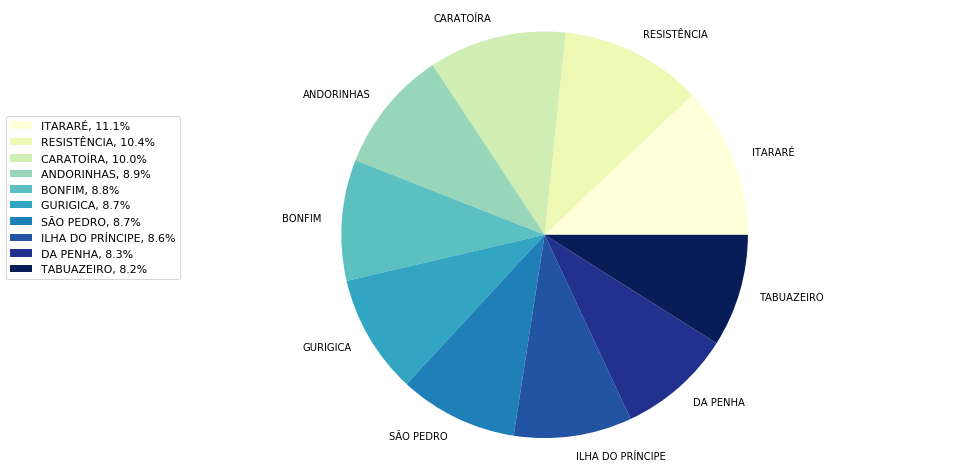

In [31]:
#using pie chart to see its proportion
theme = plt.get_cmap('YlGnBu')
new['Neighbourhood'].value_counts()[:10].plot.pie(cmap = theme, figsize = [14.7, 8.27],);

plt.ylabel("")
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, values)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.axis('equal');

### Research Question 2 : Among those places, what is the most possible reason for their absence?

At this part, we will group every places and sum up the Boolean values in every possible factors of not showing up.

In [10]:
#top 10 neighbourhoods

myneighbourhoods = new['Neighbourhood'].value_counts()[:10].index
myneighbourhoods

Index(['ITARARÉ', 'RESISTÊNCIA', 'CARATOÍRA', 'ANDORINHAS', 'BONFIM',
       'GURIGICA', 'SÃO PEDRO', 'ILHA DO PRÍNCIPE', 'DA PENHA', 'TABUAZEIRO'],
      dtype='object')

In [11]:
def neighbourhoodsvaluecounts(grp, neighbourhood):
    #group 'Neighbourhood' and sum up Boolean values
    
    #get the group for particular neighbourhood
    grpN = grp.get_group(neighbourhood)
    
    #not counting neighbourhoods and No_show columns
    grpN = grpN.drop(['Neighbourhood', 'No_show'], axis = 1)
    
    #return results(value counts for each column)
    return(grpN.apply(pd.value_counts))

In [32]:
#display the table we need
n = new.groupby(new['Neighbourhood'])

from IPython.core.display import display
for neighbourhood in myneighbourhoods:
    print(neighbourhood)
    display(neighbourhoodsvaluecounts(n, neighbourhood))

ITARARÉ


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,186,111,221,253,262,156
Yes,89,164,54,22,13,119


RESISTÊNCIA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,163,114,202,232,245,144
Yes,94,143,55,25,12,113


CARATOÍRA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,145,109,196,233,235,188
Yes,104,140,53,16,14,61


ANDORINHAS


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,130,96,161,208,207,153
Yes,92,126,61,14,15,69


BONFIM


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,129,99,179,193,209,138
Yes,90,120,40,26,10,81


GURIGICA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,105,101,167,200,209,132
Yes,111,115,49,16,7,84


SÃO PEDRO


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,149,95,167,173,201,138
Yes,66,120,48,42,14,77


ILHA DO PRÍNCIPE


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,73,140,198,206,204,94
Yes,141,74,16,8,10,120


DA PENHA


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,122,91,161,173,182,133
Yes,85,116,46,34,25,74


TABUAZEIRO


,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
No,100,100,168,196,191,111
Yes,104,104,36,8,13,93


After adding up all values we need, we can finally create a chart.

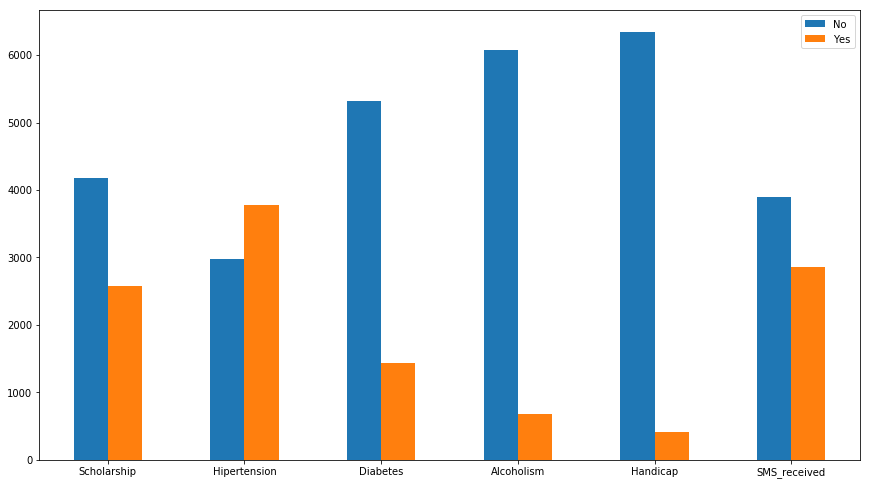

In [28]:
#get transpose (.T) and plot
## Reason -x axis variable are the row index

new[["Scholarship", 
     "Hipertension", 
     "Diabetes", 
     "Alcoholism", 
     "Handicap", 
     "SMS_received"]].apply(pd.value_counts).T.plot.bar(figsize = [14.7, 8.27], rot = 0);

As we can see, most of the patients who didn't show up might be attributed to three factors: Hipertension, no scholarship, and no SMS message received.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


By using value count and pie chart, we find out that Itararé have the most people not showing up at appointments. As for the most possible factor of their absence, Hipertension, a chronic which might cause severe illness or putting oneself in the risk of death. Secondly, not having financial subsidy could impact the patient's decision of not going to medical centres. Without receiving appointment notification could also be easy to ignore. However, since we are looking at a sample data, we couldn't really know what results it will lead. The data we analyzed might not give every information we need, all we can do is guessing or assuming. That is, to answer the given question accurately, there are still a lot missing.

## References

[1][**How to pie Chart with different color themes in Matplotlib?**](https://www.pythonprogramming.in/how-to-pie-chart-with-different-color-themes-in-matplotlib.html)

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0